In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [4]:
N = y.shape[0]

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [20]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx.dot(w)
    N = len(y)
    loss = 0.5 * np.mean(e.T.dot(e))
    return loss

In [21]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)

def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))

# 2 Grid Search

Fill in the function `grid_search()` below:

Let us play with the grid search demo now!

In [26]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for row, w00 in enumerate(w0):
        for col, w11 in enumerate(w1):
            w = np.array([w00,w11])
            losses[row, col] = compute_loss(y, tx, w)
    return losses

### Spacing = 10 :

Grid Search: loss*=424244.8314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.017 seconds


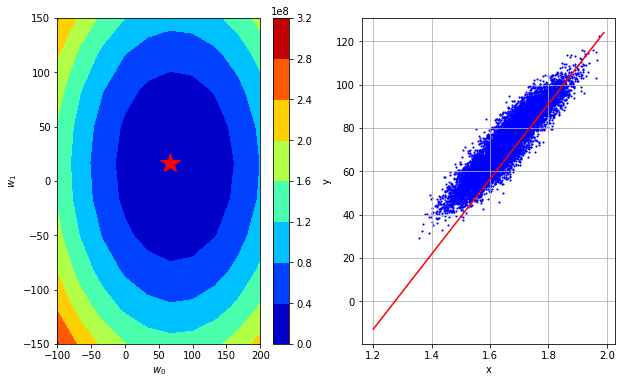

In [27]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Spacing = 50 :

Grid Search: loss*=187935.41019523237, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.286 seconds


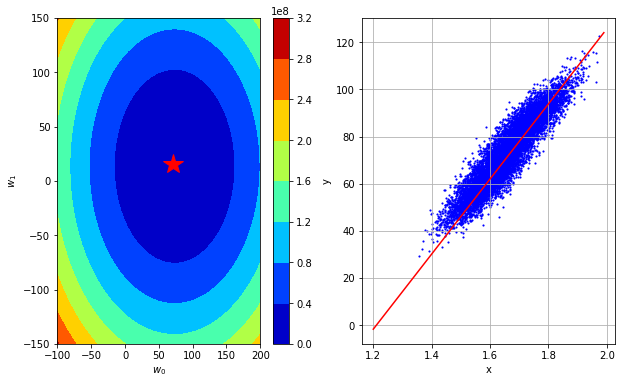

In [28]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Spacing = 25 :

Grid Search: loss*=173211.5716391587, w0*=75.0, w1*=12.5, execution time=0.128 seconds


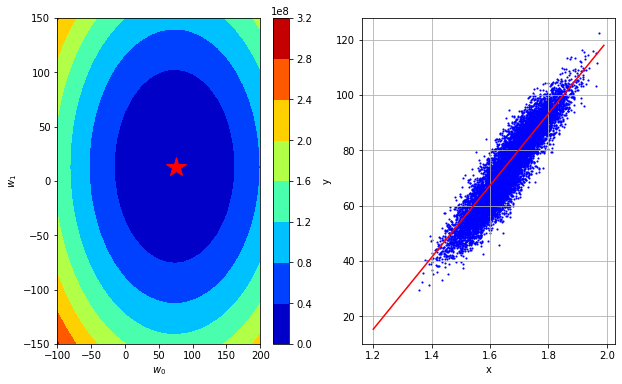

In [29]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=25)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [30]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = y - tx.dot(w)
    gradient = - 1/len(e) * tx.T.dot(e)
    return gradient, e

In [16]:
g0, e0 = compute_gradient(y, tx, np.array([100,20]))
g1, e1 = compute_gradient(y, tx, np.array([50,10]))
print("|g0|=",np.linalg.norm(g0))
print("|g1|=",np.linalg.norm(g1))

|g0|= 27.49052112929254
|g1|= 23.552392678247738


Please fill in the functions `gradient_descent` below:

In [17]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = []
    losses = []
    w = initial_w 
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        g, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * g
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [31]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.302462108962, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.87837955044161, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.410212120174496, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.47

In [32]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Trying different values of step sizes:

gamma = 0.001, 0.01, 0.5, 1, 2, 2.5

In [33]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([50, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=4029.569369155007, w0=52.329392200210535, w1=91.3479712434989
Gradient Descent(1/49): loss=3266.874507710633, w0=54.425845180399996, w1=83.56114536264792
Gradient Descent(2/49): loss=2649.0916699406907, w0=56.312652862570516, w1=76.55300206988201
Gradient Descent(3/49): loss=2148.6875713470354, w0=58.01077977652398, w1=70.2456731063927
Gradient Descent(4/49): loss=1743.3602514861755, w0=59.53909399908211, w1=64.56907703925235
Gradient Descent(5/49): loss=1415.04512239888, w0=60.91457679938443, w1=59.460140578826014
Gradient Descent(6/49): loss=1149.1098678381704, w0=62.15251131965651, w1=54.862097764442304
Gradient Descent(7/49): loss=933.702311643995, w0=63.26665238790139, w1=50.72385923149698
Gradient Descent(8/49): loss=759.2221911267135, w0=64.26937934932177, w1=46.99944455184619
Gradient Descent(9/49): loss=617.8932935077155, w0=65.17183361460012, w1=43.64747134016047
Gradient Descent(10/49): loss=503.416886436327, w0=65.98404245335063, w1=40.630695449

In [34]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [46]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    losses = []
    ws = []
    w = initial_w
    i=0
    print("Stochastic Gradient Descent: batch_size={bs}, max_iterations={mi}".format(
    bs=batch_size, mi=max_iters))
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                #compute gradient and loss and update w
                g, err = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
                loss = calculate_mse(err)
                w = w - gamma * g
                #append ws and losses
                ws.append(w)
                losses.append(loss)
                print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

**Batch size = 1**, `normal SGD`

In [49]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: batch_size=1, max_iterations=50
Stochastic Gradient Descent(0/49): loss=2192.341574321212, w0=33.108470021440226, w1=-8.983629479084794
Stochastic Gradient Descent(1/49): loss=11.444242545942242, w0=35.50056560334558, w1=-13.00865581458566
Stochastic Gradient Descent(2/49): loss=832.9154183905389, w0=55.907861092833386, w1=-17.862568096435293
Stochastic Gradient Descent(3/49): loss=197.19899645456982, w0=65.83758909652437, w1=-15.238938032841709
Stochastic Gradient Descent(4/49): loss=920.0580952946242, w0=87.28587685213115, w1=13.850387010178459
Stochastic Gradient Descent(5/49): loss=15.481009482707382, w0=84.50370059219475, w1=13.029324888144474
Stochastic Gradient Descent(6/49): loss=122.94683568944303, w0=76.66320202101181, w1=-5.258869883991524
Stochastic Gradient Descent(7/49): loss=317.1623556841569, w0=64.0703001377254, w1=5.9364851140028385
Stochastic Gradient Descent(8/49): loss=253.12863338690835, w0=75.32038087936695, w1=8.266757127080123
Stoch

In [50]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

**Batch size = 32**, `Mini-Batch SGD`

In [51]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 32

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: batch_size=32, max_iterations=50
Stochastic Gradient Descent(0/49): loss=2967.375990701823, w0=53.166684521468405, w1=17.700520600527703
Stochastic Gradient Descent(1/49): loss=175.66726998964066, w0=65.79021581158577, w1=14.13812315010028
Stochastic Gradient Descent(2/49): loss=40.55683894689941, w0=70.83284336060609, w1=12.649075316488128
Stochastic Gradient Descent(3/49): loss=20.28430770361514, w0=72.84676465890097, w1=13.48161343947122
Stochastic Gradient Descent(4/49): loss=10.73016206632318, w0=72.52849553991734, w1=14.024559284519876
Stochastic Gradient Descent(5/49): loss=12.134063033977158, w0=74.26655728405086, w1=13.40550569146329
Stochastic Gradient Descent(6/49): loss=25.916397897721946, w0=73.64364996813423, w1=13.014750775382534
Stochastic Gradient Descent(7/49): loss=14.055978597200799, w0=72.77490560223531, w1=13.764356650819645
Stochastic Gradient Descent(8/49): loss=12.72401499177308, w0=72.0663341940067, w1=13.828885076282084
Stochastic

In [52]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

**Batch size = N**, `full GD`

In [53]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = N

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: batch_size=10000, max_iterations=50
Stochastic Gradient Descent(0/49): loss=2792.236712759167, w0=51.30574540147365, w1=9.435798704492262
Stochastic Gradient Descent(1/49): loss=265.3024621089597, w0=66.69746902191572, w1=12.266538315839998
Stochastic Gradient Descent(2/49): loss=37.878379550441174, w0=71.31498610804834, w1=13.11576019924433
Stochastic Gradient Descent(3/49): loss=17.41021212017447, w0=72.70024123388814, w1=13.37052676426563
Stochastic Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
Stochastic Gradient Descent(5/49): loss=15.402284895265298, w0=73.24049073296565, w1=13.469885724623941
Stochastic Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Stochastic Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Stochastic Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Stochast

In [54]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [55]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [56]:
x.shape

(200,)

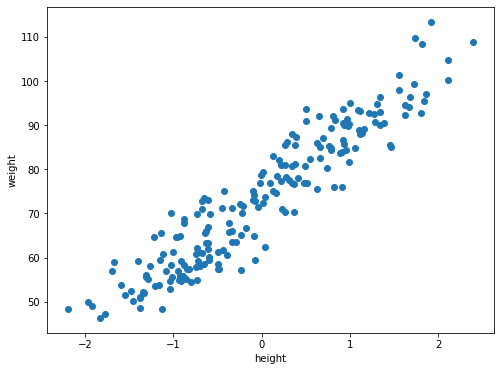

In [57]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

#### Fitting a linear regression model

We will use simple GD

In [58]:
# Define the parameters of the algorithm.
max_iters = 40
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/39): loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/39): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/39): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/39): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/39): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/39): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/39): loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/39): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/39): loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/39): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/39): loss=13.64343490969756, w0=73.63214202236942, w1=1

In [59]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [60]:
height_1, weight_1, gender_1 = load_data(sub_sample=True, add_outlier=True)
x_1, mean_x_1, std_x_1 = standardize(height_1)
y_1, tx_1 = build_model_data(x_1, weight_1)

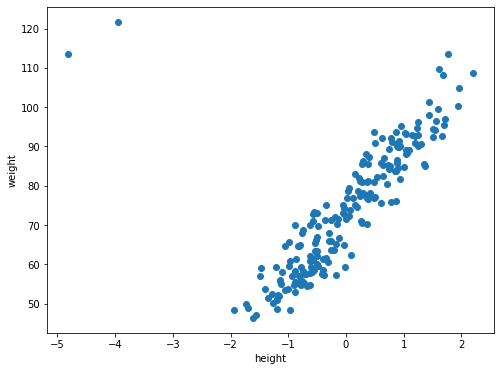

In [61]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x_1,y_1)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [62]:
# Define the parameters of the algorithm.
max_iters = 40
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(
    y_1, tx_1, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/39): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/39): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/39): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/39): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/39): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/39): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/39): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/39): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/39): loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/39): loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/39): loss=65.93073020036948, w0=74.06767464603033, w1=11.034875

In [63]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x_1, std_x_1, height_1, weight_1, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [64]:
def compute_loss_mae(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx.dot(w)
    return calculate_mae(e)

In [65]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx.dot(w)
    subgradient = ???
    return subgradient, e

SyntaxError: invalid syntax (<ipython-input-65-7d1ce32eacad>, line 4)